In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)


10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

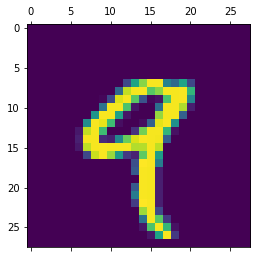

In [ ]:
# to get plotting image
plt.matshow(X_train[4])

In [ ]:
# as you see when x_train image is given 9 then it y train is 9
y_train[4]

9

In [ ]:
# length of x train is 60000 and 28 by 28 2d matrix
X_train.shape

(60000, 28, 28)

In [ ]:
# convert it into 1d
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [ ]:
# converted in 1d
X_train_flattened.shape


(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4670 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.9141
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9259


In [ ]:
# check the accuracy of test data
model.evaluate(X_test_flattened,y_test);

313/313 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.9247


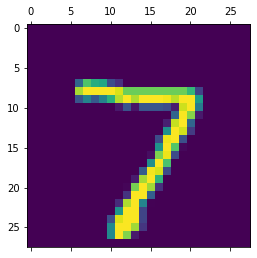

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_pred = model.predict(X_test_flattened)
# it contain all the accuracy score from 1 to 9 sso find max
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.3657328e-02, 4.7401741e-07, 7.2823763e-02, 9.6564400e-01,
       1.9338957e-03, 1.5873635e-01, 2.0579257e-06, 9.9971187e-01,
       8.3617248e-02, 6.4065486e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    9,   11,    2,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   3,   12,  943,   14,    6,    4,   14,    8,   24,    4],
       [   3,    0,   25,  919,    0,   29,    2,   10,   14,    8],
       [   1,    2,    6,    2,  908,    0,   15,    4,    9,   35],
       [   7,    3,    3,   28,    7,  795,   19,    4,   20,    6],
       [   7,    3,    9,    1,    7,   12,  917,    2,    0,    0],
       [   1,    7,   27,    8,    8,    1,    0,  941,    0,   35],
       [   8,   15,    7,   26,    9,   50,    9,   11,  831,    8],
       [  10,    7,    2,   11,   25,   10,    0,   21,    3,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

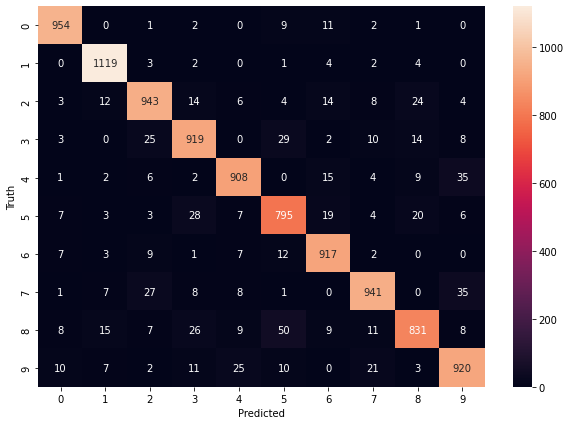

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')